<a href="https://colab.research.google.com/github/Snehi1/Python_projects/blob/main/global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS

In [ ]:
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.887000e+04,18870.000000,18870.000000,18870.000000,18870.000000,18870.000000,18870.000000,18123.000000,1.812300e+04,18870.000000,...,4.330000e+02,1.0,9.000000e+01,1.0,670.000000,510.000000,18869.000000,18869.000000,18869.000000,18869.000000
mean,1.978580e+11,1978.517011,6.198781,15.206465,0.019131,177.541176,5.416428,26.370738,-4.786345e+03,1.289401,...,3.788639e+06,20000.0,1.333696e+06,0.0,2.902985,8.225490,-3.631989,-3.589485,0.249987,-2.612963
std,3.406406e+08,3.409654,3.448318,8.955007,0.136989,166.162416,3.357730,22.515713,6.402079e+05,0.952265,...,4.845468e+07,NaN,4.800603e+06,NaN,1.298898,28.655294,4.529369,4.575088,0.645339,4.518743
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-8.618590e+07,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.977042e+11,1977.000000,3.000000,8.000000,0.000000,69.000000,2.000000,13.692880,-8.688120e+01,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.979101e+11,1979.000000,6.000000,15.000000,0.000000,110.000000,5.000000,33.888523,-6.926293e+00,1.000000,...,0.000000e+00,20000.0,7.750000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.981082e+11,1981.000000,9.000000,23.000000,0.000000,209.000000,8.000000,43.184180,9.174508e+00,1.000000,...,4.350000e+05,20000.0,7.750000e+05,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.983052e+11,1986.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,1.726362e+02,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,215.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.info

<bound method DataFrame.info of             eventid  iyear  imonth  iday approxdate  extended resolution  \
0      197000000001   1970       7     2        NaN         0        NaN   
1      197000000002   1970       0     0        NaN         0        NaN   
2      197001000001   1970       1     0        NaN         0        NaN   
3      197001000002   1970       1     0        NaN         0        NaN   
4      197001000003   1970       1     0        NaN         0        NaN   
...             ...    ...     ...   ...        ...       ...        ...   
69498  199910040002   1999      10     4        NaN         0        NaN   
69499  199910040003   1999      10     4        NaN         0        NaN   
69500  199910040004   1999      10     4        NaN         0        NaN   
69501  199910040005   1999      10     4        NaN         0        NaN   
69502  199910040006   1999      10     4        NaN         0        NaN   

       country         country_txt  region  ...  \
0   

In [ ]:
df.shape

(69503, 135)

In [ ]:
df.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    69448
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       62041
Length: 135, dtype: int64

In [ ]:
print(df.region_txt.unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia' nan]


In [ ]:
print(df['region_txt'].value_counts())

South America                  16437
Western Europe                 13383
Central America & Caribbean    10252
Middle East & North Africa      9335
South Asia                      7702
Sub-Saharan Africa              4471
Southeast Asia                  2900
North America                   2789
Eastern Europe                  1094
East Asia                        603
Central Asia                     329
Australasia & Oceania            207
Name: region_txt, dtype: int64


In [ ]:
df.groupby("region_txt")["region_txt"].agg('count')

region_txt
Australasia & Oceania            207
Central America & Caribbean    10252
Central Asia                     329
East Asia                        603
Eastern Europe                  1094
Middle East & North Africa      9335
North America                   2789
South America                  16437
South Asia                      7702
Southeast Asia                  2900
Sub-Saharan Africa              4471
Western Europe                 13383
Name: region_txt, dtype: int64

yahan pe after grouping we are doing and grouping again accordance to region and then counting.

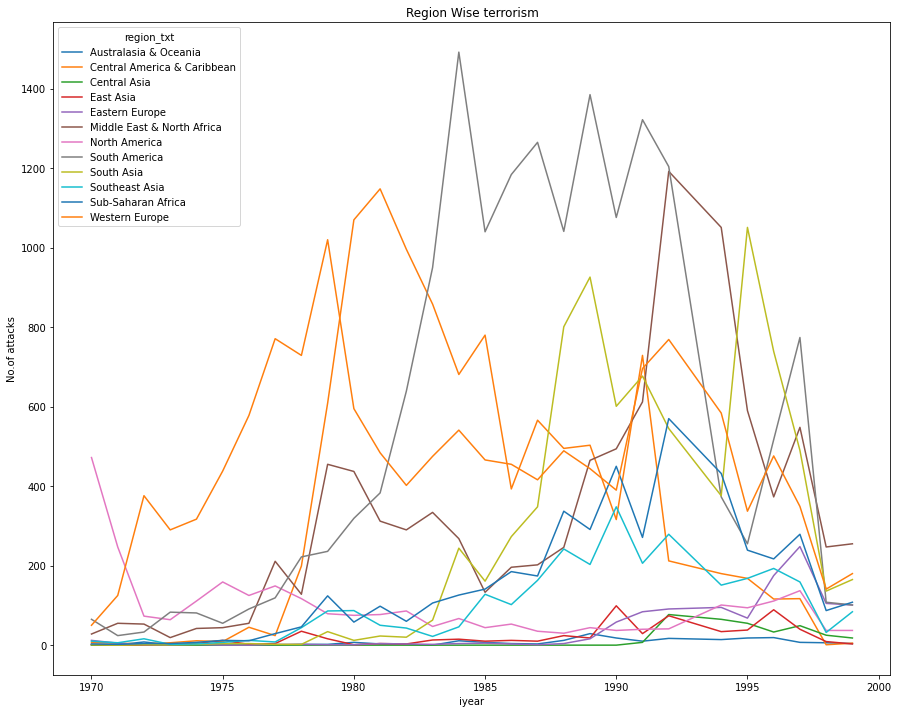

In [ ]:
pd.crosstab(df.iyear,df.region_txt).plot(figsize=(15,12))
plt.title("Region Wise terrorism")
plt.ylabel("No.of attacks")
plt.show()

In [ ]:
countryList=df['country_txt'].tolist()
    
# initialize an empty string
str1 = "" 
    
# traverse in the string  
for ele in countryList:
    ele=ele.replace(" ","")
    str1 += ele + " " 
print(str1)

DominicanRepublic Mexico Philippines Greece Japan UnitedStates Uruguay UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates Italy UnitedStates UnitedStates EastGermany(GDR) Ethiopia UnitedStates UnitedStates UnitedStates UnitedStates Uruguay UnitedStates UnitedStates UnitedStates Guatemala Philippines Venezuela UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates EastGermany(GDR) UnitedStates UnitedStates UnitedStates UnitedStates Philippines UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates WestGermany(FRG) UnitedStates UnitedStates WestGermany(FRG) UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates UnitedStates W

we are generating the sentence which we will using it in wordcloud.

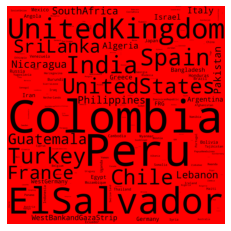

In [ ]:
wc1=(WordCloud(background_color='red', collocations=False,height=3000,width=3000)).generate(str1)
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
wc1.recolor(color_func = black_color_func)
plt.imshow(wc1,interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
india_df=df[df['country_txt']=='India']
print(india_df['city'].value_counts())

Unknown            448
Srinagar           359
Amritsar           135
New Delhi          116
Ludhiana            68
                  ... 
Kendumundi           1
Chakania             1
Masapur              1
Mehanwana            1
Dhalai District      1
Name: city, Length: 971, dtype: int64


In [ ]:
india_df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6.0,...,NaN,NaN,NaN,NaN,Hijacking DB,1.0,1.0,1.0,1.0,NaN
2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6.0,...,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0.0,0.0,0.0,0.0,NaN
3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
5327,197709280004,1977,9,28,NaN,0,NaN,92,India,6.0,...,NaN,NaN,NaN,NaN,Hijacking DB,1.0,1.0,1.0,1.0,NaN
7337,197901130004,1979,1,13,NaN,0,NaN,92,India,6.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN


In [ ]:
india_df.shape

(3019, 135)

In [ ]:
cityIndia=india_df['city'].value_counts().to_dict()
print(cityIndia)

df2=pd.DataFrame(list(cityIndia.items()),columns=['places','count']).head(10)
print(df2)

{'Unknown': 448, 'Srinagar': 359, 'Amritsar': 135, 'New Delhi': 116, 'Ludhiana': 68, 'Chandigarh': 46, 'Delhi': 42, 'Darjeeling': 36, 'Jammu': 28, 'Jalandhar': 28, 'Kokrajhar district': 26, 'Amritsar District': 25, 'Anantnag': 25, 'Bombay': 25, 'Batala': 22, 'Imphal': 21, 'Chennai': 21, 'Tarn Taran': 19, 'Barpeta District': 17, 'Guwahati': 17, 'Coimbatore': 17, 'Bhatinda': 17, 'Sopore': 17, 'Patiala': 16, 'Gauhati': 14, 'Sangrur': 14, 'Firozpur district': 13, 'Gurdaspur': 12, 'Gurdaspur District': 10, 'Faridkot': 10, 'Firozpur': 10, 'Kupwara': 9, 'Baramulla': 9, 'Sangrur District': 9, 'Amritsar district': 9, 'Pahalgam': 9, 'Kurseong': 9, 'Pulwama': 8, 'Pathankot': 7, 'Patiala district': 7, 'Hoshiapur': 7, 'Kalimpong': 7, 'Bangalore': 7, 'Jaipur': 7, 'Calcutta': 7, 'Udalguri': 7, 'Anantnag district': 6, 'Jalandhar district': 6, 'Mumbai': 6, 'Barpeta': 6, 'ludhiana': 6, 'Moga': 6, 'Panipat': 6, 'Kokrajhar': 6, 'Barnala': 5, 'Gurdaspur district': 5, 'Ajnala': 5, 'Ludhiana District': 5, 'J

                city  count
1           Srinagar    359
2           Amritsar    135
3          New Delhi    116
4           Ludhiana     68
5         Chandigarh     46
..               ...    ...
966       Kendumundi      1
967         Chakania      1
968          Masapur      1
969        Mehanwana      1
970  Dhalai District      1

[970 rows x 2 columns]


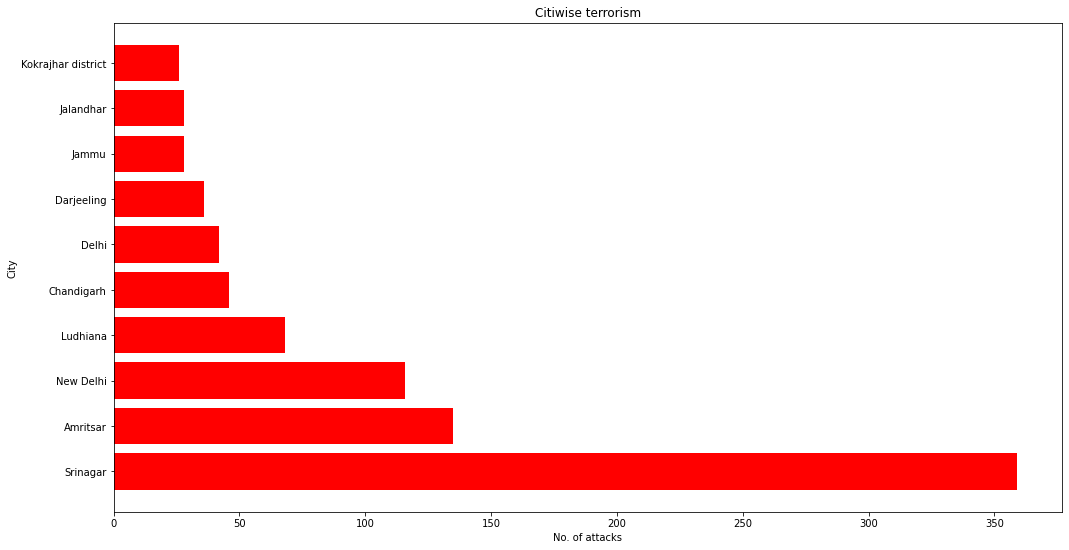

In [ ]:

cityDict=india_df['city'].value_counts().to_dict()


df3=pd.DataFrame(list(cityDict.items()),columns=['city','count'])
df3.drop(index=df3.index[0],axis=0,inplace=True)
print(df3)

yaxis=df3['city'].head(10).tolist()
xaxis=df3['count'].head(10).tolist()
fig = plt.figure(figsize = (17, 9))
plt.barh(yaxis,xaxis,color="red")
plt.ylabel("City")
plt.xlabel("No. of attacks")
plt.title("Citiwise terrorism")
plt.show()

Unknown               1140
Sikh Extremists        709
Muslim Separatists     114
Bodo Militants          87
Muslim Militants        75
Name: gname, dtype: int64


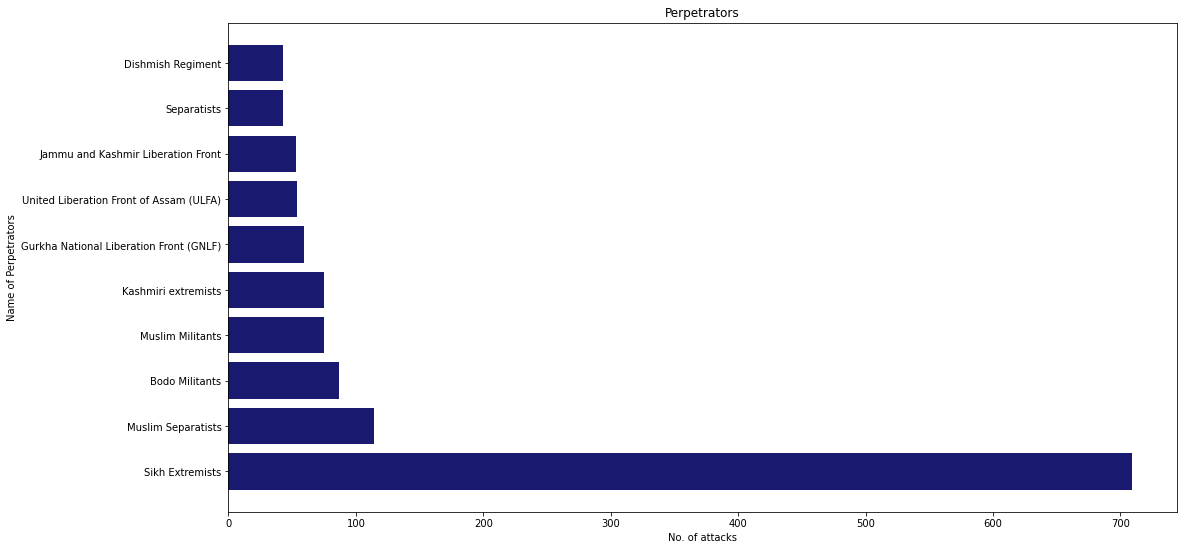

None


In [ ]:

print(india_df['gname'].value_counts().head())

gnameDict=india_df['gname'].value_counts().to_dict()


df4=pd.DataFrame(list(gnameDict.items()),columns=['grname','count'])

df4.drop(index=df4.index[0],axis=0,inplace=True)

yaxis=df4['grname'].head(10).tolist()
xaxis=df4['count'].head(10).tolist()
fig = plt.figure(figsize = (17, 9))
plt.barh(yaxis,xaxis,color='midnightblue')
plt.ylabel("Name of Perpetrators")
plt.xlabel("No. of attacks")
plt.title("Perpetrators")
print(plt.show())

In [ ]:
sikh_Df=india_df[india_df["gname"]=="Sikh Extremist"]
sikh_Df["iyear"]

Series([], Name: iyear, dtype: int64)

In [ ]:
yearDict=sikh_Df['iyear'].value_counts().to_dict()
#print(mydict)

df5=pd.DataFrame(list(yearDict.items()),columns=['year','count']).head(10)
print(df5)

Empty DataFrame
Columns: [year, count]
Index: []


In [ ]:
print(sikh_Df["country_txt"])

Series([], Name: country_txt, dtype: object)


In [ ]:
CountryDict=sikh_Df['country_txt'].value_counts().to_dict()
#print(CountryDict)

df6=pd.DataFrame(list(CountryDict.items()),columns=['year','count'])
print(df6)

Empty DataFrame
Columns: [year, count]
Index: []


In [ ]:
#which year terrorist activities were at peak
#print(df['iyear'].value_counts())
tyearDict=india_df['iyear'].value_counts().to_dict()
#print(tyearDict)

df7=pd.DataFrame(list(tyearDict.items()),columns=['yr','count'])
print(df7)

      yr  count
0   1988    358
1   1990    349
2   1991    339
3   1989    324
4   1992    237
5   1996    213
6   1997    193
7   1995    179
8   1987    166
9   1984    159
10  1994    107
11  1986     96
12  1999     89
13  1998     61
14  1983     47
15  1985     39
16  1979     20
17  1981     16
18  1982     13
19  1980     10
20  1975      1
21  1977      1
22  1976      1
23  1972      1


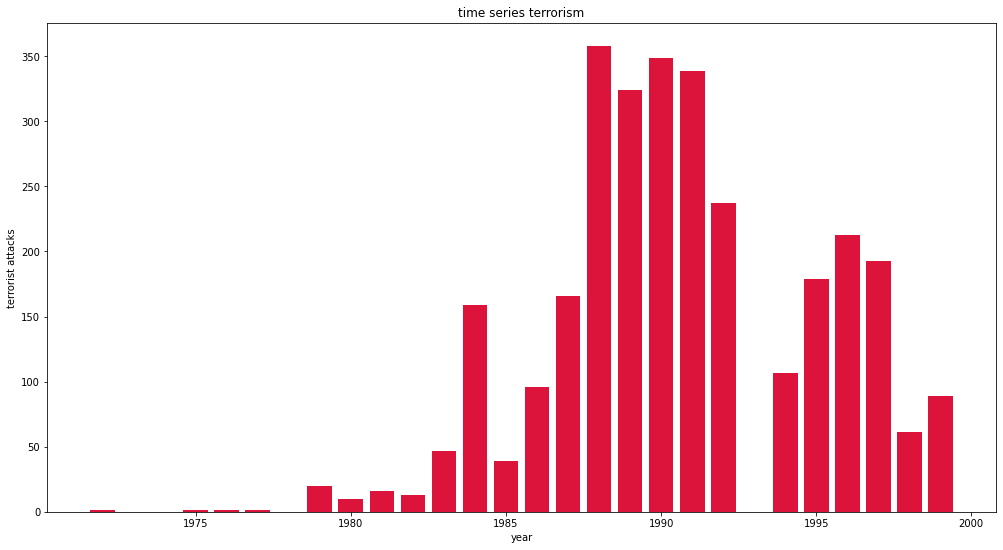

In [ ]:
fig = plt.figure(figsize = (17, 9))
plt.bar(df7["yr"],df7["count"],width=0.8, bottom=None,align='center',color='crimson')
plt.xlabel("year")
plt.ylabel("terrorist attacks")
plt.title("time series terrorism")
plt.show()

                       attacktype  count
0               Bombing/Explosion    993
1                   Armed Assault    811
2                   Assassination    798
3     Hostage Taking (Kidnapping)    141
4                         Unknown    118
5  Facility/Infrastructure Attack    107
6                 Unarmed Assault     32
7                       Hijacking     19


Text(0.5, 1.0, 'Different types of terrorist attack')

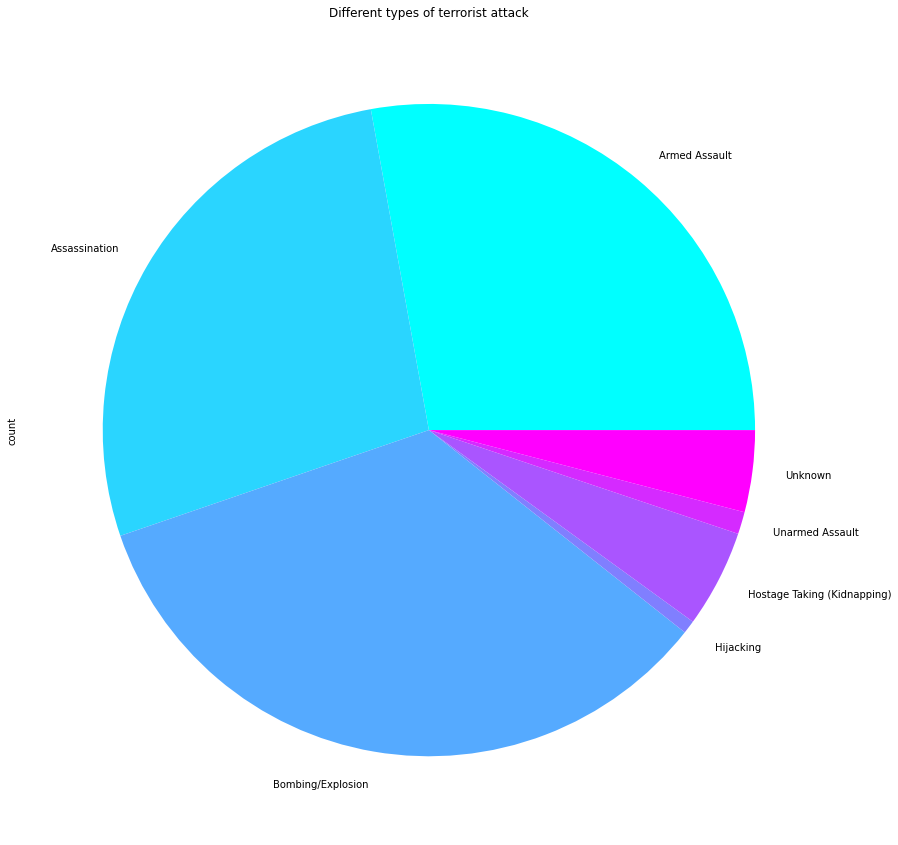

In [ ]:
#print(df['attacktype1_txt'].value_counts().head())

attackDict=india_df['attacktype1_txt'].value_counts().to_dict()
#print(attackDict)

df8=pd.DataFrame(list(attackDict.items()),columns=['attacktype','count'])
print(df8)
df8.drop(index=df8.index[5],axis=0,inplace=True)


df8.groupby(['attacktype'])['count'].sum().plot(kind='pie',figsize=(20,15),cmap="cool")
plt.title("Different types of terrorist attack")

Private Citizens & Property       792
Police                            635
Government (General)              425
Transportation                    299
Business                          261
Military                          181
Religious Figures/Institutions     97
Unknown                            85
Violent Political Party            61
Educational Institution            55
Journalists & Media                28
Airports & Aircraft                24
Utilities                          21
Government (Diplomatic)            16
Terrorists/Non-State Militia       12
Tourists                           12
NGO                                 6
Telecommunication                   5
Food or Water Supply                3
Maritime                            1
Name: targtype1_txt, dtype: int64
                        targettype  count
0      Private Citizens & Property    792
1                           Police    635
2             Government (General)    425
3                   Transportation    

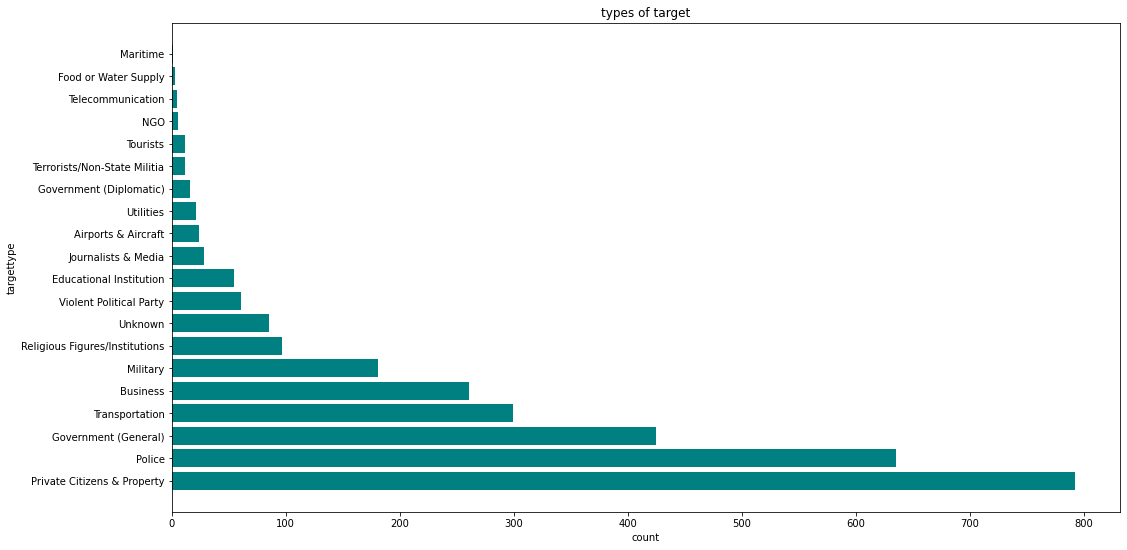

In [ ]:
print(india_df['targtype1_txt'].value_counts())
trgtDict=india_df['targtype1_txt'].value_counts().to_dict()
#print(trgtDict)

df9=pd.DataFrame(list(trgtDict.items()),columns=['targettype','count'])

print(df9)

yaxis=df9['targettype'].tolist()
xaxis=df9['count'].tolist()
fig = plt.figure(figsize = (17, 9))
plt.barh(yaxis,xaxis,color='teal')
plt.ylabel("targettype")
plt.xlabel("count")
plt.title("types of target")
plt.show()

Explosives                                                                     29388
Firearms                                                                       25792
Unknown                                                                         6703
Incendiary                                                                      5876
Melee                                                                           1504
Chemical                                                                         108
Sabotage Equipment                                                                37
Other                                                                             32
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       29
Fake Weapons                                                                      22
Biological                                                                         8
Radiological                                                     

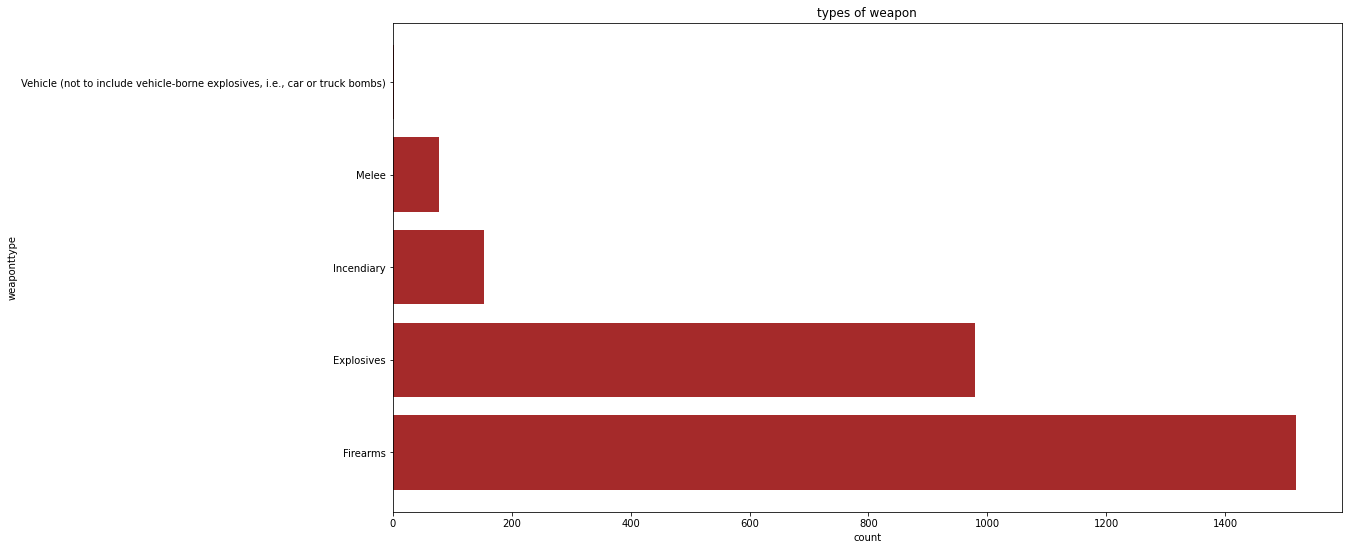

In [ ]:
print(df['weaptype1_txt'].value_counts())
weapDict=india_df['weaptype1_txt'].value_counts().to_dict()
#print(weapDict)

df10=pd.DataFrame(list(weapDict.items()),columns=['weapontype','count'])
df10.drop(index=df10.index[2],axis=0,inplace=True)
df10.drop(index=df10.index[8],axis=0,inplace=True)
print(df10)

yaxis=df10['weapontype'].head().tolist()
xaxis=df10['count'].head().tolist()
fig = plt.figure(figsize = (17, 9))
plt.barh(yaxis,xaxis,color='brown')
plt.ylabel("weaponttype")
plt.xlabel("count")
plt.title("types of weapon")
plt.show()

                                  propertydamage  estimate
0                    Minor (likely < $1 million)       122
1                                        Unknown       102
2  Major (likely >= $1 million but < $1 billion)         1


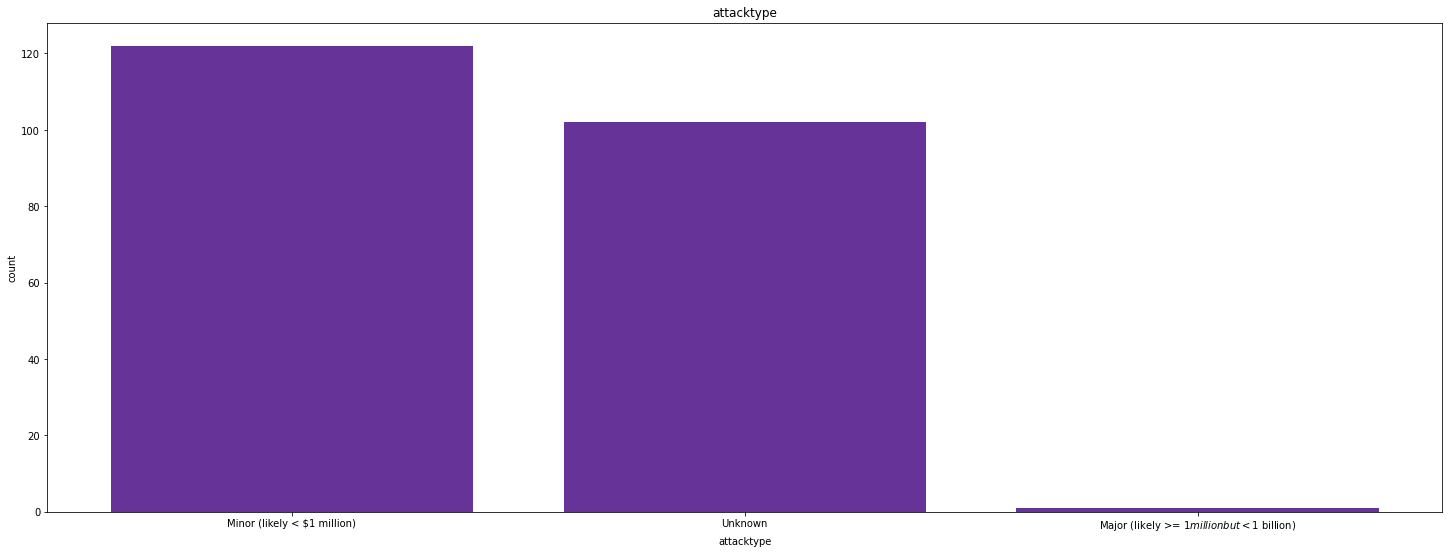

In [ ]:
#print(df['propextent_txt'].value_counts())

damageDict=india_df['propextent_txt'].value_counts().to_dict()
#print(damageDict)

df11=pd.DataFrame(list(damageDict.items()),columns=['propertydamage','estimate'])
print(df11)

fig = plt.figure(figsize = (25, 9))
plt.bar(df11["propertydamage"],df11["estimate"],width=0.8, bottom=None,align='center',color='rebeccapurple')
plt.xlabel("attacktype")
plt.ylabel("count")
plt.title("attacktype")
plt.show()